In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
import seaborn as sns
# from keras.datasets import mnist
from keras.datasets import imdb
from keras.datasets import reuters

from keras import models
from keras import layers
from keras import optimizers
from keras import losses
from keras import metrics

from keras.utils.np_utils import to_categorical

plt.style.use('ggplot')

%matplotlib inline

Using TensorFlow backend.


### Single Class Multilabel classification

In [2]:
# loading the data
(train_data, train_labels),(test_data,test_labels) = reuters.load_data(num_words=10000)

In [3]:
len(train_data),len(test_data)

(8982, 2246)

In [4]:
# index to word
word_index = reuters.get_word_index()
reverse_word_index = dict([(value,key) 
                           for (key,value) 
                           in word_index.items() ])
def decoded_newswire(array_list):
    newswire = ' '.join([reverse_word_index.get(i - 3,'?')
                        for i in array_list])
    return newswire


In [5]:
decoded_newswire(test_data[0])

'? the great atlantic and pacific tea co said its three year 345 mln dlr capital program will be be substantially increased to ? growth and expansion plans for ? inc and ? inc over the next two years a and p said the acquisition of ? in august 1986 and ? in december helped us achieve better than expected results in the fourth quarter ended february 28 its net income from continuing operations jumped 52 6 pct to 20 7 mln dlrs or 55 cts a share in the latest quarter as sales increased 48 3 pct to 1 58 billion dlrs a and p gave no details on the expanded capital program but it did say it completed the first year of the program during 1986 a and p is 52 4 pct owned by lt ? ? of west germany reuter 3'

In [6]:
# encoding the features
def vectorize_sequences(sequences,dimensions=10000):
    results = np.zeros([len(sequences),dimensions])
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results

In [7]:
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [8]:
# encoding the category (one hot)
def to_one_hot(labels,dimensions=46):
    results = np.zeros([len(labels),dimensions])
    for i, label in enumerate(labels):
        results[i, label] = 1.
    return results

# # alternate way using inbuilt keras tools
# one_hot_train_label = to_categorical(train_labels)
# one_hot_test_labels = to_categorical(test_labels)

In [9]:
one_hot_train_labels = to_one_hot(train_labels)
one_hot_test_labels = to_one_hot(test_labels)

In [10]:
# Model definition

model = models.Sequential()

model.add(layers.Dense(64, 
                       activation='relu', 
                       input_shape=(10000,)))

model.add(layers.Dense(64, 
                       activation='relu'))

model.add(layers.Dense(46,
                       activation='softmax'))


In [11]:
# compiling the model
model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])


In [12]:
# Validation set
x_val = x_train[:1000]
partial_x_train = x_train[1000:]

y_val = one_hot_train_labels[:1000]
partial_y_train = one_hot_train_labels[1000:]

In [13]:
# Training the model

history = model.fit(partial_x_train,
                   partial_y_train,
                   epochs=20,
                   batch_size=512,
                   validation_data=(x_val, y_val))

Train on 7982 samples, validate on 1000 samples
Epoch 1/20
7982/7982 [==============================] - 2s 205us/step - loss: 2.5225 - acc: 0.4984 - val_loss: 1.7172 - val_acc: 0.6130
Epoch 2/20
7982/7982 [==============================] - 1s 130us/step - loss: 1.4440 - acc: 0.6887 - val_loss: 1.3493 - val_acc: 0.7070
Epoch 3/20
7982/7982 [==============================] - 1s 129us/step - loss: 1.0979 - acc: 0.7643 - val_loss: 1.1728 - val_acc: 0.7410
Epoch 4/20
7982/7982 [==============================] - 1s 134us/step - loss: 0.8715 - acc: 0.8160 - val_loss: 1.0832 - val_acc: 0.7580
Epoch 5/20
7982/7982 [==============================] - 1s 143us/step - loss: 0.7048 - acc: 0.8485 - val_loss: 0.9859 - val_acc: 0.7840
Epoch 6/20
7982/7982 [==============================] - 1s 141us/step - loss: 0.5675 - acc: 0.8805 - val_loss: 0.9415 - val_acc: 0.8050
Epoch 7/20
7982/7982 [==============================] - 1s 132us/step - loss: 0.4595 - acc: 0.9052 - val_loss: 0.9101 - val_acc: 0.8050


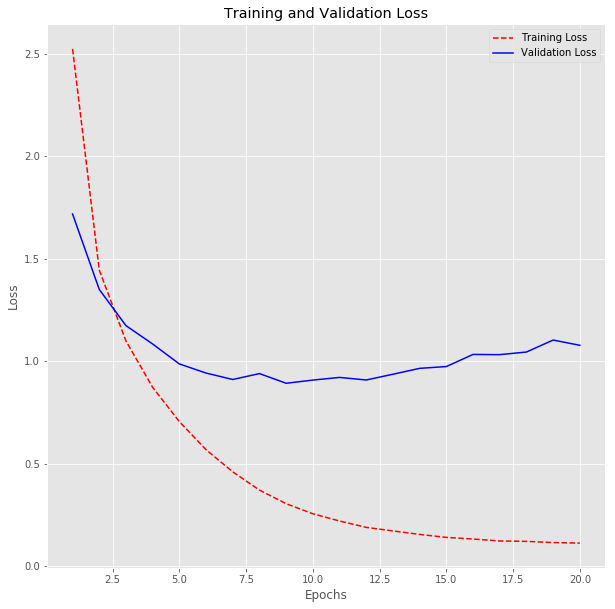

In [14]:
# plot training and validation loss
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1,len(loss)+1)

plt.figure(figsize=(10,10))
plt.plot(epochs,loss,'r--',label='Training Loss')
plt.plot(epochs,val_loss,'b-',label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend();

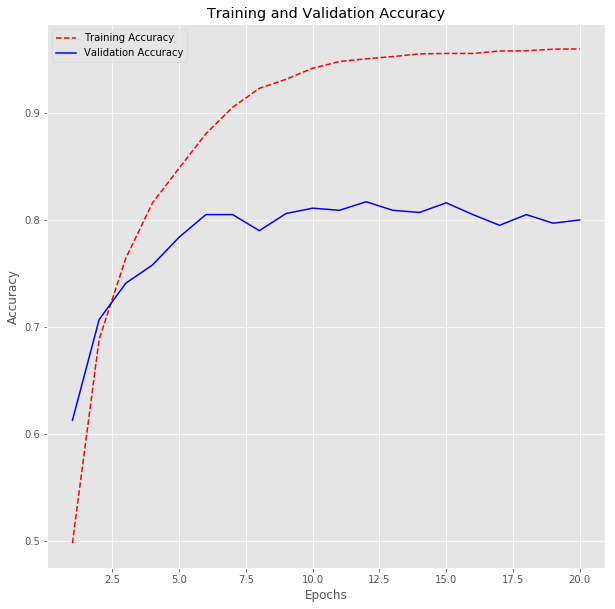

In [15]:
# plot training and validation accuracy
acc = history.history['acc']
val_acc = history.history['val_acc']
epochs = range(1,len(acc)+1)

plt.figure(figsize=(10,10))
plt.plot(epochs,acc,'r--',label='Training Accuracy')
plt.plot(epochs,val_acc,'b-',label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend();

In [16]:
# Retraining the model from scratch
model1 = models.Sequential()
model1.add(layers.Dense(64,
                        activation='relu',
                        input_shape=(10000,)))
model1.add(layers.Dense(64,
                        activation='relu'))
model1.add(layers.Dense(46,
                        activation='softmax'))

model1.compile(optimizer='rmsprop',
               loss='categorical_crossentropy',
               metrics=['accuracy'])
model1.fit(partial_x_train,
           partial_y_train,
           epochs=9,
           batch_size=512,
           validation_data=(x_val, y_val))

results = model1.evaluate(x_test, one_hot_test_labels)
print('\ntest loss: ',results[0],' test accuracy: ',results[1])

Train on 7982 samples, validate on 1000 samples
Epoch 1/9
7982/7982 [==============================] - 2s 214us/step - loss: 2.5278 - acc: 0.5241 - val_loss: 1.6786 - val_acc: 0.6550
Epoch 2/9
7982/7982 [==============================] - 1s 150us/step - loss: 1.3699 - acc: 0.7136 - val_loss: 1.2750 - val_acc: 0.7240
Epoch 3/9
7982/7982 [==============================] - 1s 136us/step - loss: 1.0105 - acc: 0.7798 - val_loss: 1.1353 - val_acc: 0.7470
Epoch 4/9
7982/7982 [==============================] - 1s 139us/step - loss: 0.7957 - acc: 0.8257 - val_loss: 1.0532 - val_acc: 0.7610
Epoch 5/9
7982/7982 [==============================] - 1s 136us/step - loss: 0.6366 - acc: 0.8642 - val_loss: 0.9782 - val_acc: 0.7980
Epoch 6/9
7982/7982 [==============================] - 1s 135us/step - loss: 0.5081 - acc: 0.8929 - val_loss: 0.9084 - val_acc: 0.8130
Epoch 7/9
7982/7982 [==============================] - 1s 134us/step - loss: 0.4093 - acc: 0.9154 - val_loss: 0.8915 - val_acc: 0.8210
Epoch 8

In [17]:
y_train = np.array(train_labels)
y_test = np.array(test_labels)

In [18]:
y_train

array([ 3,  4,  3, ..., 25,  3, 25])

In [19]:
# alternate way to encode labels
y_train = np.array(train_labels)
y_test = np.array(test_labels)

# Model definition

model2 = models.Sequential()

model2.add(layers.Dense(64, 
                       activation='relu', 
                       input_shape=(10000,)))

model2.add(layers.Dense(64, 
                       activation='relu'))

model2.add(layers.Dense(46,
                       activation='softmax'))

# compiling the model
# loss function sparse_categorical_crossentropy
model2.compile(optimizer='rmsprop',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])


y_val = y_train[:1000]
partial_y_train = y_train[1000:]

# Training the model
history = model2.fit(partial_x_train,
                   partial_y_train,
                   epochs=20,
                   batch_size=512,
                   validation_data=(x_val, y_val))


Train on 7982 samples, validate on 1000 samples
Epoch 1/20
7982/7982 [==============================] - 2s 194us/step - loss: 2.6070 - acc: 0.4648 - val_loss: 1.7200 - val_acc: 0.6350
Epoch 2/20
7982/7982 [==============================] - 1s 133us/step - loss: 1.3996 - acc: 0.7105 - val_loss: 1.2722 - val_acc: 0.7280
Epoch 3/20
7982/7982 [==============================] - 1s 134us/step - loss: 1.0386 - acc: 0.7804 - val_loss: 1.1025 - val_acc: 0.7620
Epoch 4/20
7982/7982 [==============================] - 1s 153us/step - loss: 0.8144 - acc: 0.8310 - val_loss: 1.0283 - val_acc: 0.7870
Epoch 5/20
7982/7982 [==============================] - 1s 133us/step - loss: 0.6477 - acc: 0.8641 - val_loss: 0.9536 - val_acc: 0.8040
Epoch 6/20
7982/7982 [==============================] - 1s 138us/step - loss: 0.5278 - acc: 0.8904 - val_loss: 0.9219 - val_acc: 0.8060
Epoch 7/20
7982/7982 [==============================] - 1s 133us/step - loss: 0.4197 - acc: 0.9109 - val_loss: 0.9027 - val_acc: 0.8120


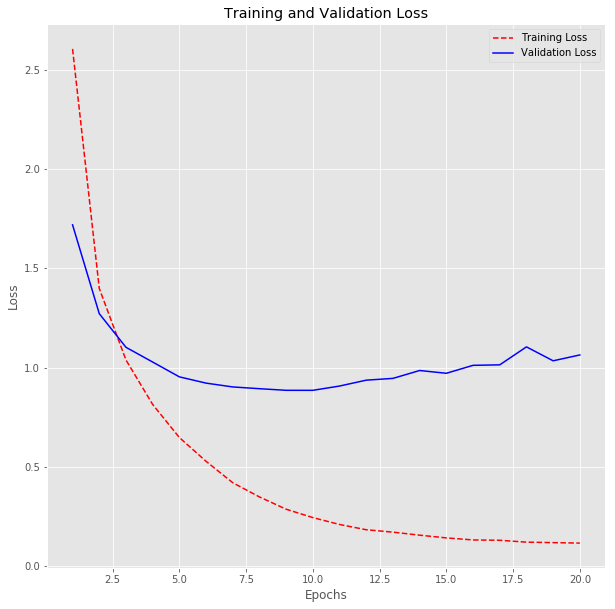

In [20]:
# plot training and validation loss
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1,len(loss)+1)

plt.figure(figsize=(10,10))
plt.plot(epochs,loss,'r--',label='Training Loss')
plt.plot(epochs,val_loss,'b-',label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend();

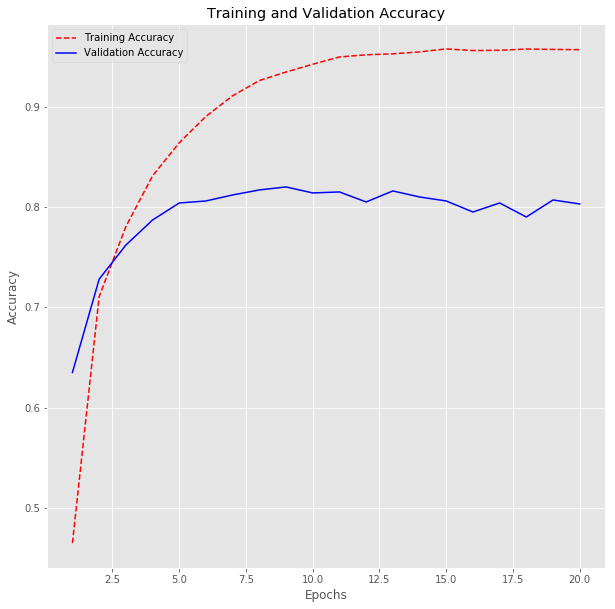

In [21]:
# plot training and validation accuracy
acc = history.history['acc']
val_acc = history.history['val_acc']
epochs = range(1,len(acc)+1)

plt.figure(figsize=(10,10))
plt.plot(epochs,acc,'r--',label='Training Accuracy')
plt.plot(epochs,val_acc,'b-',label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend();

In [24]:
# Retraining the model from scratch
model2 = models.Sequential()
model2.add(layers.Dense(64,
                        activation='relu',
                        input_shape=(10000,)))
model2.add(layers.Dense(64,
                        activation='relu'))
model2.add(layers.Dense(46,
                        activation='softmax'))

model2.compile(optimizer='rmsprop',
               loss='sparse_categorical_crossentropy',
               metrics=['accuracy'])
model2.fit(partial_x_train,
           partial_y_train,
           epochs=9,
           batch_size=512,
           validation_data=(x_val, y_val))

results = model2.evaluate(x_test, y_test)
print('\ntest loss: ',results[0],' test accuracy: ',results[1])

Train on 7982 samples, validate on 1000 samples
Epoch 1/9
7982/7982 [==============================] - 2s 245us/step - loss: 2.6496 - acc: 0.5431 - val_loss: 1.7413 - val_acc: 0.6330
Epoch 2/9
7982/7982 [==============================] - 1s 171us/step - loss: 1.4260 - acc: 0.7068 - val_loss: 1.3115 - val_acc: 0.7130
Epoch 3/9
7982/7982 [==============================] - 1s 162us/step - loss: 1.0547 - acc: 0.7786 - val_loss: 1.1289 - val_acc: 0.7500
Epoch 4/9
7982/7982 [==============================] - 1s 139us/step - loss: 0.8386 - acc: 0.8188 - val_loss: 1.0553 - val_acc: 0.7770
Epoch 5/9
7982/7982 [==============================] - 1s 125us/step - loss: 0.6726 - acc: 0.8558 - val_loss: 0.9873 - val_acc: 0.7830
Epoch 6/9
7982/7982 [==============================] - 1s 157us/step - loss: 0.5386 - acc: 0.8891 - val_loss: 0.9244 - val_acc: 0.8080
Epoch 7/9
7982/7982 [==============================] - 1s 166us/step - loss: 0.4325 - acc: 0.9090 - val_loss: 0.9277 - val_acc: 0.7980
Epoch 8

In [25]:
# alternate models with less hidden nodes
# information bottleneck

model3 = models.Sequential()
model3.add(layers.Dense(64,
                        activation='relu',
                        input_shape=(10000,)))
model3.add(layers.Dense(4,
                        activation='relu'))
model3.add(layers.Dense(46,
                        activation='softmax'))

model3.compile(optimizer='rmsprop',
               loss='sparse_categorical_crossentropy',
               metrics=['accuracy'])
model3.fit(partial_x_train,
           partial_y_train,
           epochs=50,
           batch_size=512,
           validation_data=(x_val, y_val))
# validation accuracy stuck around 70%

Train on 7982 samples, validate on 1000 samples
Epoch 1/50
7982/7982 [==============================] - 2s 206us/step - loss: 3.3569 - acc: 0.4243 - val_loss: 2.9186 - val_acc: 0.5730
Epoch 2/50
7982/7982 [==============================] - 1s 127us/step - loss: 2.6419 - acc: 0.5737 - val_loss: 2.3750 - val_acc: 0.5830
Epoch 3/50
7982/7982 [==============================] - 1s 150us/step - loss: 2.1531 - acc: 0.5898 - val_loss: 2.0021 - val_acc: 0.5860
Epoch 4/50
7982/7982 [==============================] - 1s 140us/step - loss: 1.8228 - acc: 0.6041 - val_loss: 1.7652 - val_acc: 0.5950
Epoch 5/50
7982/7982 [==============================] - 1s 140us/step - loss: 1.6021 - acc: 0.6201 - val_loss: 1.6208 - val_acc: 0.6120
Epoch 6/50
7982/7982 [==============================] - 1s 139us/step - loss: 1.4470 - acc: 0.6426 - val_loss: 1.5199 - val_acc: 0.6290
Epoch 7/50
7982/7982 [==============================] - 1s 132us/step - loss: 1.3290 - acc: 0.6589 - val_loss: 1.4498 - val_acc: 0.6300


In [ ]:
# alternate models with less hidden nodes
# information bottleneck

model3 = models.Sequential()
model3.add(layers.Dense(64,
                        activation='relu',
                        input_shape=(10000,)))
model3.add(layers.Dense(4,
                        activation='relu'))
model3.add(layers.Dense(46,
                        activation='softmax'))

model3.compile(optimizer='rmsprop',
               loss='sparse_categorical_crossentropy',
               metrics=['accuracy'])
model3.fit(partial_x_train,
           partial_y_train,
           epochs=20,
           batch_size=512,
           validation_data=(x_val, y_val))

In [26]:
# alternate models with one hidden layer
# less represenations

model4 = models.Sequential()
model4.add(layers.Dense(64,
                        activation='relu',
                        input_shape=(10000,)))
model4.add(layers.Dense(46,
                        activation='softmax'))

model4.compile(optimizer='rmsprop',
               loss='sparse_categorical_crossentropy',
               metrics=['accuracy'])
model4.fit(partial_x_train,
           partial_y_train,
           epochs=20,
           batch_size=512,
           validation_data=(x_val, y_val))

Train on 7982 samples, validate on 1000 samples
Epoch 1/20
7982/7982 [==============================] - 2s 201us/step - loss: 2.7238 - acc: 0.5276 - val_loss: 1.9829 - val_acc: 0.6640
Epoch 2/20
7982/7982 [==============================] - 1s 147us/step - loss: 1.5816 - acc: 0.7194 - val_loss: 1.4400 - val_acc: 0.7180
Epoch 3/20
7982/7982 [==============================] - 1s 132us/step - loss: 1.1283 - acc: 0.7843 - val_loss: 1.1851 - val_acc: 0.7560
Epoch 4/20
7982/7982 [==============================] - 1s 129us/step - loss: 0.8651 - acc: 0.8259 - val_loss: 1.0386 - val_acc: 0.7900
Epoch 5/20
7982/7982 [==============================] - 1s 140us/step - loss: 0.6861 - acc: 0.8647 - val_loss: 0.9480 - val_acc: 0.8040
Epoch 6/20
7982/7982 [==============================] - 1s 148us/step - loss: 0.5570 - acc: 0.8903 - val_loss: 0.8967 - val_acc: 0.8160
Epoch 7/20
7982/7982 [==============================] - 1s 133us/step - loss: 0.4596 - acc: 0.9065 - val_loss: 0.8606 - val_acc: 0.8180


In [29]:
# alternate models with four hidden layer


model4 = models.Sequential()
model4.add(layers.Dense(64,
                        activation='relu',
                        input_shape=(10000,)))

model4.add(layers.Dense(64,
                        activation='relu'))

model4.add(layers.Dense(64,
                        activation='relu'))

model4.add(layers.Dense(64,
                        activation='relu'))

model4.add(layers.Dense(46,
                        activation='softmax'))

model4.compile(optimizer='rmsprop',
               loss='sparse_categorical_crossentropy',
               metrics=['accuracy'])

model4.fit(partial_x_train,
           partial_y_train,
           epochs=50,
           batch_size=512,
           validation_data=(x_val, y_val))

# no improvement on adding hidden layers

Train on 7982 samples, validate on 1000 samples
Epoch 1/50
7982/7982 [==============================] - 2s 243us/step - loss: 2.5968 - acc: 0.4530 - val_loss: 1.6720 - val_acc: 0.6090
Epoch 2/50
7982/7982 [==============================] - 1s 150us/step - loss: 1.4583 - acc: 0.6668 - val_loss: 1.3625 - val_acc: 0.7000
Epoch 3/50
7982/7982 [==============================] - 1s 149us/step - loss: 1.1389 - acc: 0.7333 - val_loss: 1.1882 - val_acc: 0.7360
Epoch 4/50
7982/7982 [==============================] - 1s 149us/step - loss: 0.9300 - acc: 0.7883 - val_loss: 1.1067 - val_acc: 0.7510
Epoch 5/50
7982/7982 [==============================] - 1s 137us/step - loss: 0.7321 - acc: 0.8299 - val_loss: 1.1139 - val_acc: 0.7610
Epoch 6/50
7982/7982 [==============================] - 1s 155us/step - loss: 0.6253 - acc: 0.8497 - val_loss: 1.0449 - val_acc: 0.7780
Epoch 7/50
7982/7982 [==============================] - 1s 149us/step - loss: 0.4988 - acc: 0.8881 - val_loss: 1.1465 - val_acc: 0.7570
